# bank-note 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import normalize

In [144]:
bank_df = pd.read_csv("C:/Users/USER/Desktop/happy_monk/bank_note_data.csv")

In [145]:
bank_df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [146]:
bank_df['Class'].unique()

array([0, 1], dtype=int64)

In [6]:
#statistical data analysis

In [147]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [148]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Image.Var,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Image.Skew,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Image.Curt,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [10]:
#exploratory data analysis

C:\Users\USER\anaconda3\envs\Keras\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

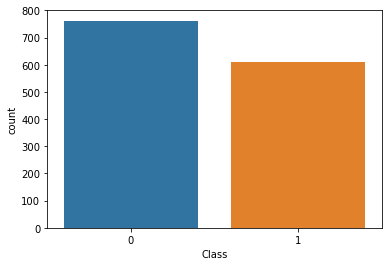

In [149]:
sns.countplot(bank_df['Class'])

<AxesSubplot:>

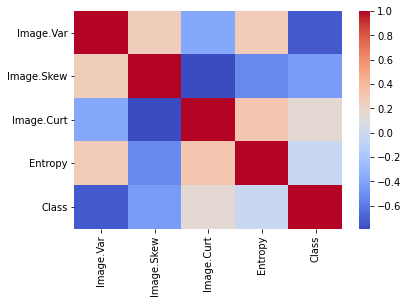

In [150]:
sns.heatmap(bank_df.corr(),cmap='coolwarm')

In [151]:
bank_df.corr()['Class'].sort_values()

Image.Var    -0.724843
Image.Skew   -0.444688
Entropy      -0.023424
Image.Curt    0.155883
Class         1.000000
Name: Class, dtype: float64

<AxesSubplot:>

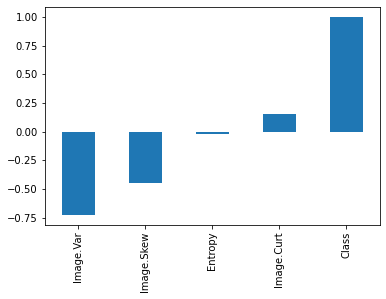

In [152]:
bank_df.corr()['Class'].sort_values().plot(kind='bar')

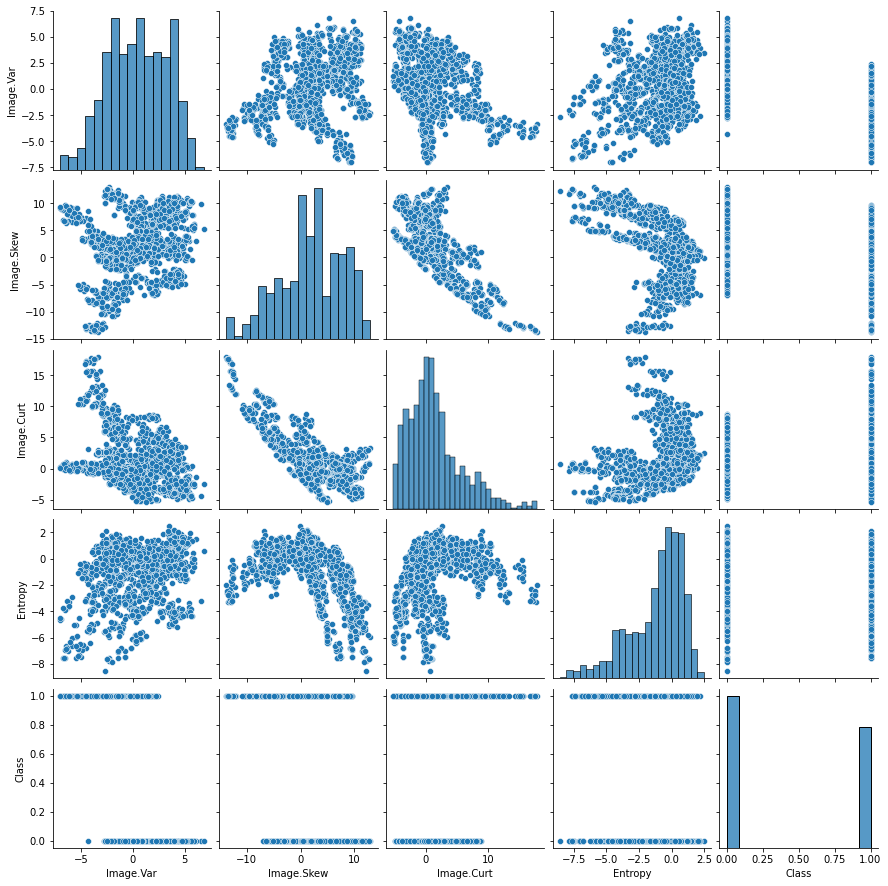

In [153]:
sns.pairplot(bank_df)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [27]:
X_train.shape,X_test.shape

((1097, 4), (275, 4))

In [28]:
X_train.min(),X_train.max()

(-13.7731, 17.9274)

In [29]:
#normalization

In [30]:
tot_len = len(bank_df)
train_len = int(0.8*tot_len)
test_len = int(0.2*tot_len)

In [31]:
X_train_norm = normalize(X,axis=0)

In [32]:
X_train_norm[:5]

array([[ 0.03401265,  0.03789594, -0.0167326 , -0.00499742],
       [ 0.04269332,  0.03571518, -0.01465421, -0.01634652],
       [ 0.03630796, -0.01153701,  0.01146898,  0.00119013],
       [ 0.03246304,  0.0416422 , -0.02390832, -0.04018599],
       [ 0.00309209, -0.01948212,  0.02724971, -0.01105495]])

In [38]:
X_train = X_train_norm[:train_len]
X_test = X_train_norm[train_len:]

In [39]:
X_train.shape,X_test.shape

((1097, 4), (275, 4))

In [40]:
#create a model

In [44]:
model_norm = Sequential()
model_norm.add(Dense(1000,input_dim=4,activation='relu'))
model_norm.add(Dense(500,activation='relu'))
model_norm.add(Dense(300,activation='relu'))
model_norm.add(Dense(1,activation='sigmoid'))
model_norm.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [45]:
model_norm_hist = model_norm.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),verbose=1)

Epoch 1/600
35/35 [==============================] - 3s 40ms/step - loss: 0.6951 - accuracy: 0.5217 - val_loss: 0.6794 - val_accuracy: 0.6000
Epoch 2/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6932 - accuracy: 0.5233 - val_loss: 0.6749 - val_accuracy: 0.6000
Epoch 3/600
35/35 [==============================] - 1s 23ms/step - loss: 0.6875 - accuracy: 0.5576 - val_loss: 0.6824 - val_accuracy: 0.6000
Epoch 4/600
35/35 [==============================] - 1s 23ms/step - loss: 0.6898 - accuracy: 0.5423 - val_loss: 0.6792 - val_accuracy: 0.6000
Epoch 5/600
35/35 [==============================] - 1s 24ms/step - loss: 0.6856 - accuracy: 0.5618 - val_loss: 0.6846 - val_accuracy: 0.6000
Epoch 6/600
35/35 [==============================] - 1s 23ms/step - loss: 0.6913 - accuracy: 0.5336 - val_loss: 0.6750 - val_accuracy: 0.6000
Epoch 7/600
35/35 [==============================] - 1s 29ms/step - loss: 0.6904 - accuracy: 0.5402 - val_loss: 0.6763 - val_accuracy: 0.6000
Epoch 

35/35 [==============================] - 1s 23ms/step - loss: 0.6830 - accuracy: 0.5590 - val_loss: 0.6875 - val_accuracy: 0.5564
Epoch 59/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6829 - accuracy: 0.5510 - val_loss: 0.6845 - val_accuracy: 0.5709
Epoch 60/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6858 - accuracy: 0.5614 - val_loss: 0.6872 - val_accuracy: 0.5964
Epoch 61/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6793 - accuracy: 0.5522 - val_loss: 0.6872 - val_accuracy: 0.5491
Epoch 62/600
35/35 [==============================] - 1s 23ms/step - loss: 0.6805 - accuracy: 0.5594 - val_loss: 0.6854 - val_accuracy: 0.5709
Epoch 63/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6822 - accuracy: 0.5630 - val_loss: 0.6872 - val_accuracy: 0.5455
Epoch 64/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6888 - accuracy: 0.5272 - val_loss: 0.6901 - val_accuracy: 0.5564
Epoch 65/600

Epoch 172/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6794 - accuracy: 0.5474 - val_loss: 0.7028 - val_accuracy: 0.5527
Epoch 173/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6731 - accuracy: 0.5593 - val_loss: 0.7140 - val_accuracy: 0.5200
Epoch 174/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6774 - accuracy: 0.5496 - val_loss: 0.7016 - val_accuracy: 0.5673
Epoch 175/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6748 - accuracy: 0.5784 - val_loss: 0.7140 - val_accuracy: 0.5273
Epoch 176/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6802 - accuracy: 0.5690 - val_loss: 0.7234 - val_accuracy: 0.5527
Epoch 177/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6669 - accuracy: 0.5889 - val_loss: 0.7120 - val_accuracy: 0.5055
Epoch 178/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6718 - accuracy: 0.5849 - val_loss: 0.7095 - val_accuracy:

Epoch 285/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6674 - accuracy: 0.5686 - val_loss: 0.8141 - val_accuracy: 0.5200
Epoch 286/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6619 - accuracy: 0.6011 - val_loss: 0.7190 - val_accuracy: 0.5564
Epoch 287/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6693 - accuracy: 0.5719 - val_loss: 0.7860 - val_accuracy: 0.5382
Epoch 288/600
35/35 [==============================] - 1s 20ms/step - loss: 0.6776 - accuracy: 0.5727 - val_loss: 0.8199 - val_accuracy: 0.5273
Epoch 289/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6645 - accuracy: 0.5867 - val_loss: 0.7055 - val_accuracy: 0.5309
Epoch 290/600
35/35 [==============================] - 1s 23ms/step - loss: 0.6625 - accuracy: 0.5907 - val_loss: 0.8162 - val_accuracy: 0.5236
Epoch 291/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6568 - accuracy: 0.5880 - val_loss: 0.7303 - val_accuracy:

Epoch 342/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6591 - accuracy: 0.5903 - val_loss: 0.7774 - val_accuracy: 0.5236
Epoch 343/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6657 - accuracy: 0.5621 - val_loss: 0.7861 - val_accuracy: 0.5345
Epoch 344/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6572 - accuracy: 0.5819 - val_loss: 0.7504 - val_accuracy: 0.5018
Epoch 345/600
35/35 [==============================] - 1s 20ms/step - loss: 0.6548 - accuracy: 0.5937 - val_loss: 0.7674 - val_accuracy: 0.4909
Epoch 346/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6708 - accuracy: 0.5694 - val_loss: 0.7817 - val_accuracy: 0.5200
Epoch 347/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6534 - accuracy: 0.5869 - val_loss: 0.7817 - val_accuracy: 0.5309
Epoch 348/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6636 - accuracy: 0.5624 - val_loss: 0.7611 - val_accuracy:

Epoch 455/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6474 - accuracy: 0.5945 - val_loss: 0.8103 - val_accuracy: 0.5273
Epoch 456/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6225 - accuracy: 0.6339 - val_loss: 0.7931 - val_accuracy: 0.5236
Epoch 457/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6347 - accuracy: 0.6294 - val_loss: 0.8884 - val_accuracy: 0.5018
Epoch 458/600
35/35 [==============================] - 1s 24ms/step - loss: 0.6449 - accuracy: 0.5996 - val_loss: 0.8565 - val_accuracy: 0.5418
Epoch 459/600
35/35 [==============================] - 1s 23ms/step - loss: 0.6469 - accuracy: 0.6085 - val_loss: 0.8664 - val_accuracy: 0.5236
Epoch 460/600
35/35 [==============================] - 1s 23ms/step - loss: 0.6451 - accuracy: 0.5988 - val_loss: 0.8758 - val_accuracy: 0.5273
Epoch 461/600
35/35 [==============================] - 1s 24ms/step - loss: 0.6316 - accuracy: 0.6027 - val_loss: 0.8341 - val_accuracy:

Epoch 568/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6367 - accuracy: 0.6240 - val_loss: 0.9549 - val_accuracy: 0.5091
Epoch 569/600
35/35 [==============================] - 1s 20ms/step - loss: 0.6167 - accuracy: 0.6417 - val_loss: 0.9240 - val_accuracy: 0.4800
Epoch 570/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6224 - accuracy: 0.6492 - val_loss: 0.9782 - val_accuracy: 0.5200
Epoch 571/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6173 - accuracy: 0.6443 - val_loss: 1.0624 - val_accuracy: 0.5200
Epoch 572/600
35/35 [==============================] - 1s 22ms/step - loss: 0.6276 - accuracy: 0.6104 - val_loss: 1.0083 - val_accuracy: 0.5200
Epoch 573/600
35/35 [==============================] - 1s 21ms/step - loss: 0.6191 - accuracy: 0.6421 - val_loss: 0.9441 - val_accuracy: 0.5382
Epoch 574/600
35/35 [==============================] - 1s 20ms/step - loss: 0.6111 - accuracy: 0.6429 - val_loss: 0.9028 - val_accuracy:

In [46]:
model_loss = pd.DataFrame(model_norm_hist.history)

<AxesSubplot:>

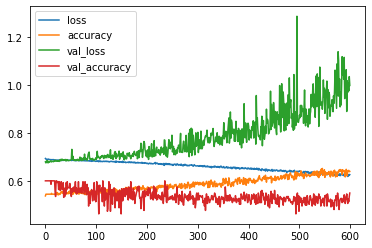

In [47]:
model_loss.plot()

In [48]:
model_pred = model_norm.predict_classes(X_test)

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [124]:
print("classification report:\n",classification_report(y_test,model_pred))
print("\n")

print("f1 score:\n",f1_score(y_test,model_pred))
print("\n")

print("confusion metrix:\n",confusion_matrix(y_test,model_pred))

print("accuracy score:",accuracy_score(y_test,model_pred))

classification report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.63       165
           1       0.43      0.40      0.42       110

    accuracy                           0.55       275
   macro avg       0.52      0.52      0.52       275
weighted avg       0.54      0.55      0.55       275



f1 score:
 0.41509433962264153


confusion metrix:
 [[107  58]
 [ 66  44]]
accuracy score: 0.5490909090909091


In [131]:
#standard scaler

In [155]:
import tensorflow as tf

In [140]:
scaler = StandardScaler()

In [162]:
scaler.fit(bank_df.drop('Class',axis=1))

StandardScaler()

In [163]:
scaled_feature = scaler.fit_transform(bank_df.drop('Class',axis=1))

In [164]:
df_feat = pd.DataFrame(scaled_feature,columns=bank_df.columns[:-1])

In [165]:
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [17]:
#get X and y

In [167]:
X = df_feat
y = bank_df['Class']

In [168]:
bank_df.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')

In [169]:
img_var = tf.feature_column.numeric_column("Image.Var")
img_skew = tf.feature_column.numeric_column("Image.Skew")
img_curt = tf.feature_column.numeric_column("Image.Curt")
entropy = tf.feature_column.numeric_column("Entropy")

In [159]:
feat_cols = [img_var,img_skew,img_curt,entropy]

In [160]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmpgb7l5v2m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [173]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)

In [178]:
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmpgb7l5v2m\model.ckpt-96
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 96...
INFO:tensorflow:Saving checkpoints for 96 into C:\Users\USER\AppData\Local\Temp\tmpgb7l5v2m\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 96...
INFO:tensorflow:loss = 0.6223833, step = 96
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 144...
INFO:tensorflow:Saving checkpoints for 144 into C:\Users\USER\AppData\Local\Temp\tmpgb7l5v2m\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 144...
INFO:tensorflow:Loss for final step: 0.82471144.


In [179]:
pred_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [180]:
note_preds = list(classifier.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmpgb7l5v2m\model.ckpt-144
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [181]:
note_preds[0]

{'logits': array([-2.4344772e-06], dtype=float32),
 'logistic': array([0.4999994], dtype=float32),
 'probabilities': array([0.5000006 , 0.49999937], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [182]:
final_preds = []
for pred in note_preds:
    final_preds.append(pred['class_ids'][0])

In [183]:
#evaluation

In [184]:
print(confusion_matrix(y_test,final_preds))

[[ 45 182]
 [ 29 156]]


In [185]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.61      0.20      0.30       227
           1       0.46      0.84      0.60       185

    accuracy                           0.49       412
   macro avg       0.53      0.52      0.45       412
weighted avg       0.54      0.49      0.43       412

